In [4]:
import json


with open("../../hackathon/comm_disambiguated_cvis_count.json") as open_f:
    doi_to_cziW_id_lut = json.load(open_f)

with open("enduser_doi_to_czi.json") as f:
    enduser_doi_to_czi = json.load(f)

In [15]:
import pandas as pd
pypi_with_mentions = pd.read_json("../../hackathon/pypi_with_mentions.ndjson", lines=True)


In [68]:
czi_to_name_map = {}
for i, row in pypi_with_mentions.iterrows():
    name = row["name"]
    if name == "sklearn":
        name = "scikit-learn"
    czi_to_name_map[row["czi_id"]] = name


In [69]:
pypi_ids = set(pypi_with_mentions["czi_id"])

In [70]:
filtered_doi_to_cziW_id_lut = {
    doi: set(packages) & pypi_ids for doi, packages in doi_to_cziW_id_lut.items()
    if doi in enduser_doi_to_czi
}

In [71]:
def map_czi_name(iterable):
    return {czi_to_name_map.get(x) or x for x in iterable}

result = []

for doi, packages in enduser_doi_to_czi.items():
    filtered_set = map_czi_name(filtered_doi_to_cziW_id_lut.get(doi, set()))
    enduser_set = map_czi_name(packages)
    in_both = list(filtered_set & enduser_set)
    only_enduser = list(enduser_set - filtered_set)
    only_paper = list(filtered_set - enduser_set)
    
    result.append({
        'doi': doi,
        'both': in_both,
        'both_count': len(in_both),
        'enduser': only_enduser,
        'enduser_count': len(only_enduser),
        'paper': only_paper,
        'paper_count': len(only_paper),
    })



In [72]:
import pandas as pd
df = pd.DataFrame.from_records(result)

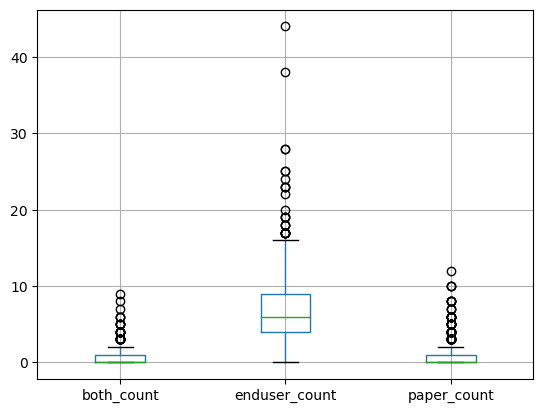

In [73]:
import matplotlib.pyplot as plt
df[["both_count", "enduser_count", "paper_count"]].boxplot()
plt.show()

In [74]:
df

,doi,both,both_count,enduser,enduser_count,paper,paper_count
0,10.15252/msb.20199235,[],0,[cobra],1,[],0
1,10.1021/acs.jcim.1c00428,[],0,[numpy],1,"[sphinx, pmx]",2
2,10.1186/s40462-021-00268-4,[],0,"[hvplot, movingpandas, osgeo, pandas, virescli...",16,[swarm],1
3,10.1093/hmg/ddaa212,[],0,"[pandas, numpy, ipython, upsetplot, matplotlib...",6,[],0
4,10.1093/bioinformatics/btaa578,"[numpy, scikit-learn]",2,"[autoreload, scipy, statsmodels, pandas, funct...",8,[aggrescan3d],1
...,...,...,...,...,...,...,...
704,10.7554/eLife.59099,[],0,"[numpy, matplotlib, scipy, scikit-image]",4,[],0
705,10.7554/eLife.54082,[],0,"[numpy, networkx, requests, seaborn, scipy, pa...",10,[],0
706,10.1371/journal.pcbi.1006333,[],0,"[autoreload, bunch, pandas, numpy, palettable,...",7,[],0
707,10.1107/S2052252520008830,[],0,"[xgboost, numpy, scikit-learn, h5py, matplotli...",6,[],0


In [75]:
from collections import Counter
df["enduser"].apply(Counter).sum()

Counter({'numpy': 575,
         'matplotlib': 545,
         'pandas': 491,
         'scipy': 344,
         'seaborn': 282,
         'ipython': 205,
         'scikit-learn': 183,
         'tqdm': 74,
         'requests': 73,
         'statsmodels': 73,
         'autoreload': 68,
         'biopython': 60,
         'networkx': 55,
         'rpy2': 49,
         'ipywidgets': 47,
         'tensorflow': 44,
         'pillow': 37,
         'opencv-python': 37,
         'plotly': 36,
         'scikit-image': 31,
         'keras': 27,
         'matplotlib-venn': 26,
         'h5py': 24,
         'cobra': 22,
         'torch': 21,
         'joblib': 20,
         'nibabel': 19,
         'umap-learn': 19,
         'rdkit': 18,
         'xgboost': 17,
         'bokeh': 16,
         'scikit-bio': 16,
         'ete3': 15,
         'pyyaml': 14,
         'nltk': 14,
         'nilearn': 12,
         'sympy': 11,
         'tifffile': 11,
         'plotnine': 11,
         'beautifulsoup4': 11,
         '

In [76]:
from collections import Counter
df["paper"].apply(Counter).sum()

Counter({'pace': 35,
         'scikit-learn': 27,
         'scipy': 13,
         'cellprofiler': 13,
         'conda': 12,
         'neuron': 11,
         'learn': 10,
         'ipynb': 9,
         'scikit-image': 7,
         'jupyter': 7,
         'ipython': 7,
         'sphinx': 6,
         'wikidata': 6,
         'pynn': 6,
         'cython': 5,
         'theano': 5,
         'py': 5,
         'statsmodels': 5,
         'escher': 5,
         'django': 5,
         'pytest': 4,
         'nbviewer': 4,
         'fasta': 4,
         'flask': 4,
         'wget': 4,
         'pip': 4,
         'matplotlib': 4,
         'kallisto': 4,
         'harmony': 4,
         'bwa': 4,
         'keras': 4,
         'linux': 4,
         'numpy': 4,
         'excel': 4,
         'mast': 4,
         'dca': 3,
         'gdal': 3,
         'pymol': 3,
         'dms': 3,
         'analysis': 3,
         'psychopy': 3,
         'lfpy': 3,
         'browser': 3,
         'figshare': 3,
         'standardsca

In [77]:
from collections import Counter
df["both"].apply(Counter).sum()

Counter({'scikit-learn': 54,
         'pandas': 38,
         'matplotlib': 36,
         'numpy': 33,
         'scipy': 29,
         'seaborn': 17,
         'statsmodels': 8,
         'scikit-image': 6,
         'networkx': 4,
         'escher': 4,
         'py2cytoscape': 3,
         'pymatgen': 3,
         'biopython': 3,
         'scanpy': 3,
         'h5py': 3,
         'rpy2': 3,
         'brian2': 2,
         'scikit-bio': 2,
         'flowcytometrytools': 2,
         'ipywidgets': 2,
         'dask': 2,
         'ipython': 2,
         'sliderunner': 2,
         'emcee': 2,
         'xarray': 2,
         'opencv-python': 2,
         'xgboost': 2,
         'ndmg': 1,
         'mdanalysis': 1,
         'deerpredict': 1,
         'h2o': 1,
         'pymuvr': 1,
         'sympy': 1,
         'rasterio': 1,
         'shapely': 1,
         'pbxplore': 1,
         'bnpy': 1,
         'langdetect': 1,
         'igraph': 1,
         'dsgrn': 1,
         'kml2geojson': 1,
         'pyomo': 

In [60]:
[k for k,v in czi_to_name_map.items() if 'sklearn' in v]

['SM124803', 'SM3414', 'SM1050847', 'SM969685']